## Assignment PCA & Clustering

#### Broadly: Tasks to be performed

1. Data Understanding & Visualizing
    - Read and understand the data
    - Import the data
    - Analyse the data
2. Clean the data
    - Conversion of data
3. Prepare the data for modelling
    - Outlier treatment
4. Modelling
    - Scaling
    - Finding Hopkins cluster tendency
    - Performing PCA on data 
    - PCA Analysis
5. Final analysis
    - K Means Clustering
    - Hierarchical Clustering
    - Resultant countries the CEO need to focus for giving aid

## 1. Read and Visualize the data
    - Import the data
    - Analyse the data


In [1]:
#Importing reqi=uired libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

In [2]:
# Reading the CSV file
# Reading the dataframe and creating dataframe for our analysis

master_df=pd.read_csv('Country-data.csv')

In [3]:
#copying the dataset into new variable to maintain a master dataset and a 
# working dataset for further analysis

ngo_df=master_df.copy()
ngo_df.head(3)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [4]:
#Get the shape of the dataset
ngo_df.shape

(167, 10)

In [5]:
#Analysing for null-values
#Looks like there are no null values in our dataset.(167 rows and 10 coulmns)
ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
#Looking at the count;mean; and the quartiles Q1-Q3. 
ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2. Clean/Conversion of data
   - Conversion of data types

In [7]:
#Converting int columns gdpp to float.
ngo_df.gdpp = ngo_df.gdpp.astype(float)
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200.0


In [8]:
#Converting exports,imports and health which are in % age to absolute values

ngo_df['exports'] = ngo_df['exports']*ngo_df['gdpp']/100
ngo_df['health'] = ngo_df['health']*ngo_df['gdpp']/100
ngo_df['imports'] = ngo_df['imports']*ngo_df['gdpp']/100
ngo_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0


In [9]:
# Describe the data again after conversion
ngo_df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Observations: describe()
From the above 'describe' data we can clearly see that 'exports','health','imports','income','inflation','gdpp' has high-number of 'max' values which can be potential outliers.
So next step we visualize the data to confirm our observation.

### Visualizing the data after conversion

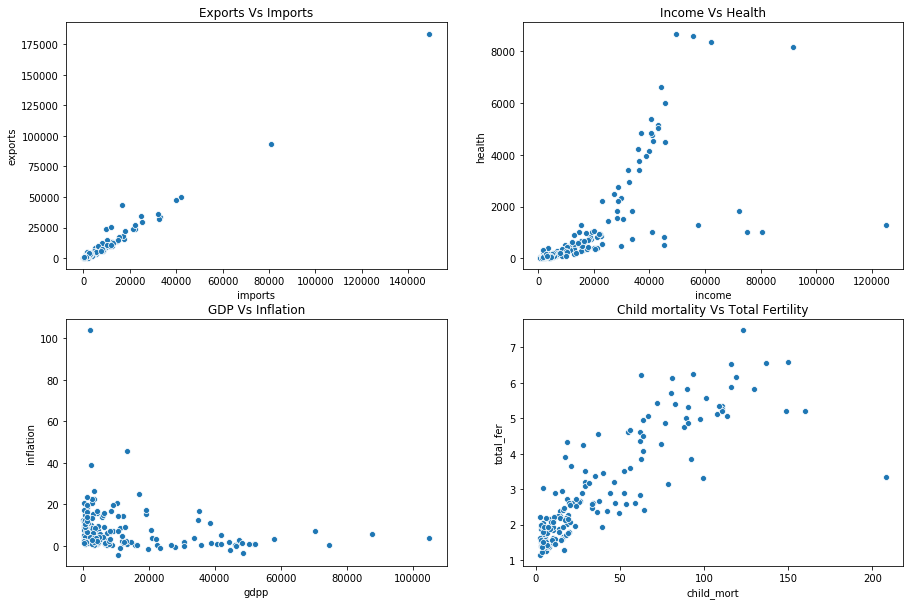

In [10]:
# Plotting scatter plots for outliers detection
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Exports Vs Imports")
sns.scatterplot(x='imports', y='exports',data=ngo_df)
plt.subplot(2,2,2)
plt.title("Income Vs Health")
sns.scatterplot(x='income', y='health',data=ngo_df)
plt.subplot(2,2,3)
plt.title("GDP Vs Inflation")
sns.scatterplot(x='gdpp', y='inflation',data=ngo_df)
plt.subplot(2,2,4)
plt.title("Child mortality Vs Total Fertility")
sns.scatterplot(x='child_mort', y='total_fer',data=ngo_df)
plt.show()

### Observations:
   From above scatter plots we can clearly see that there are outliers in the data and we need to do the outlier treatment for some columns if not all.

## 3. Prepare the data for modelling

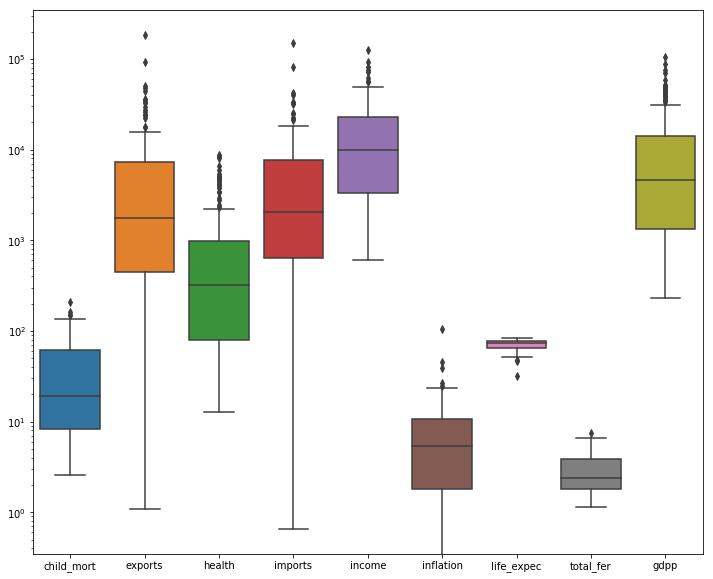

In [11]:
#Checking the data for outliers
plt.figure(figsize=(12,10))
plt.yscale('log')
sns.boxplot( data=ngo_df)
plt.show()

In [12]:
ngo_df.describe()
ngo_df.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662.0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399.0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897.0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446.0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708.0


### Outlier Treatment

#### Outliers- Primary Analysis:
From the above box plot we could observe that exports, health, imports,income,gdpp and inflation are identified as having quite a number of outliers. However, it could be also possible that they might not be outliers as they are data represnting a country and we lose a country by removing them.

In [13]:
# removing (statistical) outliers

# outlier treatment for gdp
Q1 = ngo_df.gdpp.quantile(0.05)
Q3 = ngo_df.gdpp.quantile(0.85)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.gdpp >= Q1 - 1.5*IQR) & (ngo_df.gdpp <= Q3 + 1.5*IQR)]

# outlier treatment for exports
Q1 = ngo_df.exports.quantile(0.05)
Q3 = ngo_df.exports.quantile(0.85)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.exports >= Q1 - 1.5*IQR) & (ngo_df.exports <= Q3 + 1.5*IQR)]


# outlier treatment for income
Q1 = ngo_df.income.quantile(0.05)
Q3 = ngo_df.income.quantile(0.85)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.income >= Q1 - 1.5*IQR) & (ngo_df.income <= Q3 + 1.5*IQR)]

# outlier treatment for health
Q1 = ngo_df.health.quantile(0.05)
Q3 = ngo_df.health.quantile(0.85)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.health >= Q1 - 1.5*IQR) & (ngo_df.health <= Q3 + 1.5*IQR)]


# outlier treatment for inflation
Q1 = ngo_df.inflation.quantile(0.05)
Q3 = ngo_df.inflation.quantile(0.85)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.inflation >= Q1 - 1.5*IQR) & (ngo_df.inflation <= Q3 + 1.5*IQR)]


# outlier treatment for imports
Q1 = ngo_df.imports.quantile(0.05)
Q3 = ngo_df.imports.quantile(0.85)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.imports >= Q1 - 1.5*IQR) & (ngo_df.imports <= Q3 + 1.5*IQR)]

# outlier treatment for child_mort
Q1 = ngo_df.child_mort.quantile(0.05)
Q3 = ngo_df.child_mort.quantile(0.80)
IQR = Q3 - Q1
ngo_df = ngo_df[(ngo_df.child_mort >= Q1- 1.5*IQR) & (ngo_df.child_mort <= Q3 + 1.5*IQR)]
ngo_df.shape

(137, 10)

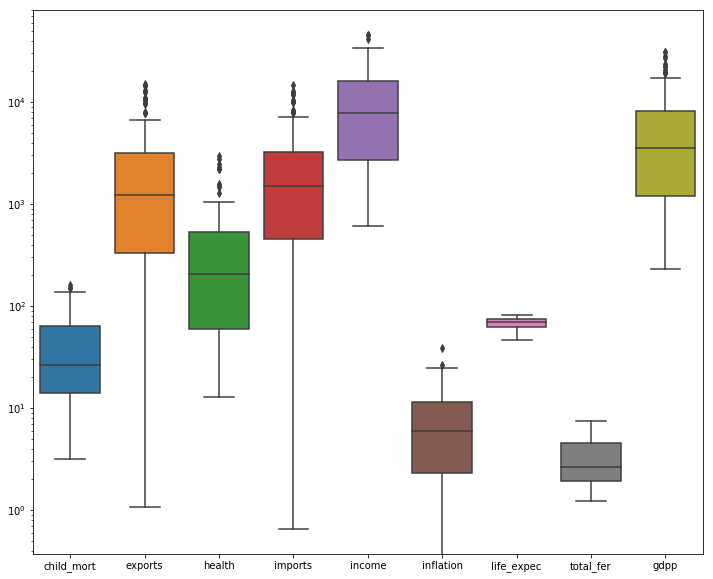

In [14]:
#Shape of the dataset after outlier treatment
#out of 167 rows, we are left with 159 rows
plt.figure(figsize=(12,10))
plt.yscale('log')
sns.boxplot( data=ngo_df)
plt.show()

In [15]:
#Data
ngo_df.describe()
ngo_df.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399.0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897.0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446.0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708.0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348.0


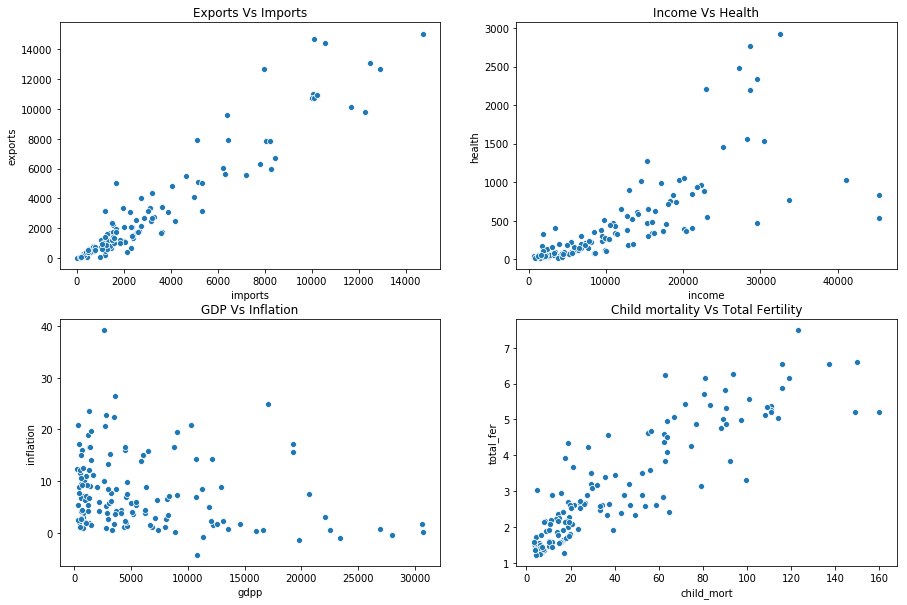

In [16]:
# Plotting scatter plots after outliers detection
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Exports Vs Imports")
sns.scatterplot(x='imports', y='exports',data=ngo_df)
plt.subplot(2,2,2)
plt.title("Income Vs Health")
sns.scatterplot(x='income', y='health',data=ngo_df)
plt.subplot(2,2,3)
plt.title("GDP Vs Inflation")
sns.scatterplot(x='gdpp', y='inflation',data=ngo_df)
plt.subplot(2,2,4)
plt.title("Child mortality Vs Total Fertility")
sns.scatterplot(x='child_mort', y='total_fer',data=ngo_df)
plt.show()

In [17]:
ngo_df.shape

(137, 10)

#### As we can see we have seen obesrved the quantiles for income as it is one the colums with outliers, and if we do the outlier treatment for the income variable we loose many countries which is not good for our analysis. So we do not remove the outliers as they seem to be not excatly ouliers in this case.

## 4. Modelling

In [18]:
#Scaling the data
scaler = StandardScaler()

In [19]:
#Removing Country feild as it is not required for scaalling
y=ngo_df.pop('country')

In [20]:
y.shape

(137,)

In [21]:
X= ngo_df.copy()
X.shape

(137, 9)

In [22]:
ngo_df_scaled=scaler.fit_transform(X)

In [23]:
ngo_df_scaled[:5,:5]

array([[ 1.23601547, -0.74656553, -0.6731889 , -0.77808047, -0.94101989],
       [-0.6935687 , -0.4418964 , -0.26986203, -0.24580005, -0.08082651],
       [-0.41304491, -0.28327502, -0.41606109, -0.42551752,  0.22623771],
       [ 1.99107014, -0.14726551, -0.56844274, -0.39065422, -0.49748268],
       [-0.85873691,  0.78969478,  0.5650092 ,  1.34483877,  0.8672472 ]])

### Finding Hopkins Statistics for our data:

- The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
    - If the value is between {0.01, ...,0.3}, the data is regularly spaced.
    - If the value is around 0.5, it is random.
    - If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
#Making a dataframe out of the scaled data to provide input to Hopkins algorithm
ngo_scaled_hopkin=pd.DataFrame(ngo_df_scaled)
ngo_scaled_hopkin.columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
ngo_scaled_hopkin.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.236015,-0.746566,-0.673189,-0.778080,-0.941020,0.242764,-1.620099,1.724618,-0.820413
1,-0.693569,-0.441896,-0.269862,-0.245800,-0.080827,-0.462849,0.939581,-0.977678,-0.294739
2,-0.413045,-0.283275,-0.416061,-0.425518,0.226238,1.192134,0.965051,-0.174117,-0.239749
3,1.991070,-0.147266,-0.568443,-0.390654,-0.497483,2.090186,-1.123445,1.944949,-0.377967
4,-0.858737,0.789695,0.565009,1.344839,0.867247,-0.897621,1.003255,-0.666622,0.910581


In [26]:
#Providing the scaled version of the dataset to Hopkins algorithm to detrmine the cluster tendency
hopkins(ngo_scaled_hopkin)

0.8596847763588142

### Observation: Hopkins Algorithm - Cluster tendency
By running the Hopkins algorithm couple of times, we got the cluster tendency as 89% and 84% for the dataframe we have which seems a good tendency and we ca go ahead with K-Means and Hierarchical clustering.

## PCA

In [27]:
#Instantiate PCA module
pca=PCA(svd_solver='randomized',random_state=42)

#### Applying PCA on the data

In [28]:
#Fitting the PCA on the data
pca.fit(ngo_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [29]:
#Analysing PCA components
pca.components_

array([[-0.31843422,  0.35625542,  0.35556516,  0.37376941,  0.37345325,
        -0.13579943,  0.3248682 , -0.30758953,  0.38404699],
       [ 0.48842775,  0.34617118,  0.20323484,  0.26168304,  0.18816071,
         0.15043946, -0.40953698,  0.49245733,  0.25209163],
       [-0.13714962,  0.04532893, -0.11363304, -0.10278029,  0.21541949,
         0.94180782,  0.13787517, -0.05570848,  0.01176813],
       [ 0.07005077, -0.47293163,  0.70381712, -0.29807401, -0.17212462,
         0.10480739,  0.16728609,  0.14348085,  0.31311188],
       [-0.02284766, -0.0930525 ,  0.18914504, -0.03602176,  0.00412869,
         0.0875909 , -0.73111684, -0.63856736,  0.06129022],
       [ 0.2300555 , -0.13496672, -0.19161612, -0.5285202 ,  0.73314   ,
        -0.21668913,  0.02203658, -0.05044446,  0.15915219],
       [ 0.7603338 ,  0.07900659,  0.02216202,  0.10166804, -0.14714162,
         0.07183063,  0.38038393, -0.47361227, -0.09493215],
       [-0.0611407 ,  0.67781999,  0.05585664, -0.62566741, -0

In [30]:
#How much variance is explined by the principal components
pca.explained_variance_ratio_


array([0.65290222, 0.14934522, 0.1063313 , 0.03891599, 0.02332838,
       0.01512471, 0.01083988, 0.00181239, 0.0013999 ])

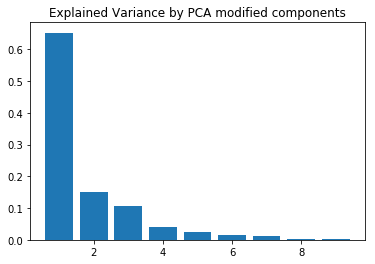

In [31]:
#Plotting the variance ratio for bettter visibility of variance explinantion
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.title('Explained Variance by PCA modified components')
plt.show()

#### From the above bar plot we can observe that first two principal components explain or dominate others in explaining the variance compared to others

In [32]:
#Calculating Cumulative sum of the variaance to determine the variance ratio of principal componeents 
#in cumulative way
cum_sum=np.cumsum(pca.explained_variance_ratio_)
cum_sum

array([0.65290222, 0.80224744, 0.90857874, 0.94749474, 0.97082312,
       0.98594783, 0.99678771, 0.9986001 , 1.        ])

### Scree Plot

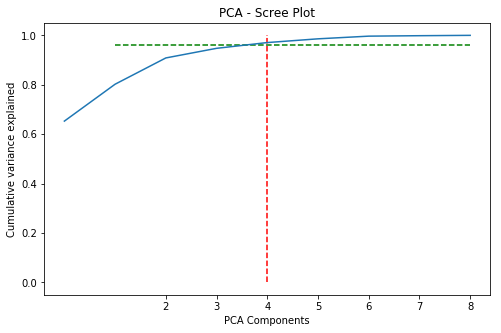

In [33]:
#Plotting a scree plot to determine visually the optimal number of pca componets for analysis

fig = plt.figure(figsize=[8,5])
plt.title('PCA - Scree Plot')
plt.xlabel('PCA Components')
x=[2,8]
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=8, xmin=1, colors="g", linestyles="--")
plt.plot(cum_sum)
plt.ylabel("Cumulative variance explained")
plt.show()

#### From the aabove scree plot we can observe that about 90% (~87)of the vaariance is explained by the the cumulative sum of 4 principle componetsratio.

#### Since 4 principal components are explaining ~90% of variancewe will go ahead with 4 principal components in our analysis

## PCA with 4 components:

In [34]:
pc2=PCA(n_components=4,random_state=42)

In [35]:
ngo_new_pca=pc2.fit_transform(ngo_df_scaled)

In [36]:
ngo_new_pca.shape

(137, 4)

In [37]:
ngo_new_pca[:10]

array([[-2.94600711,  1.17026896, -0.35007167,  0.10474659],
       [ 0.40104149, -1.63629525, -0.14176483, -0.06624841],
       [-0.07877874, -0.81520813,  1.4462532 ,  0.08643246],
       [-2.61262913,  2.24721377,  1.41868873,  0.20296292],
       [ 2.58479147, -0.16076913, -0.52124342, -0.32288033],
       [ 1.03018722, -0.39634341,  2.14625704,  1.00080479],
       [-0.16939176, -1.60711101,  0.20182704, -0.10512206],
       [ 0.17529177, -0.34086568,  1.06380876, -0.14246655],
       [ 5.50520602,  1.93100278, -1.11442271,  1.06343862],
       [ 5.22750038,  1.97349244,  0.72723355, -1.35203278]])

In [38]:
ngo_new_pca_trans=np.transpose(ngo_new_pca)

#### Making a dataframe of out it

In [39]:
df=pd.DataFrame({'PC1':ngo_new_pca_trans[0],'PC2':ngo_new_pca_trans[1],'PC3':ngo_new_pca_trans[2],
                 'PC4':ngo_new_pca_trans[3]})
# df=pd.DataFrame(ngo_new_pca, columns=['PC1','PC2'])
df.head()

,PC1,PC2,PC3,PC4
0,-2.946007,1.170269,-0.350072,0.104747
1,0.401041,-1.636295,-0.141765,-0.066248
2,-0.078779,-0.815208,1.446253,0.086432
3,-2.612629,2.247214,1.418689,0.202963
4,2.584791,-0.160769,-0.521243,-0.322880


In [40]:
y.shape

(137,)

In [41]:
## Making a new dataframe with new PCA modified columns and adding Country column
df_final=pd.DataFrame({"country": list(y),"PC1":ngo_new_pca_trans[0],"PC2":ngo_new_pca_trans[1]
                       ,"PC3":ngo_new_pca_trans[3],"PC4":ngo_new_pca_trans[3]})
df_final.shape

(137, 5)

In [42]:
df_final.shape

(137, 5)

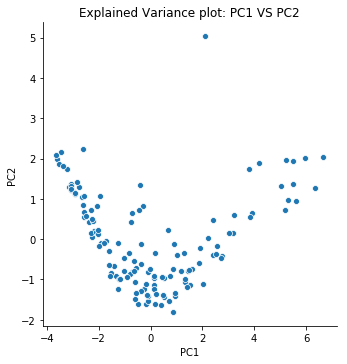

In [43]:
## Plotting a scatter plot for visualizing the data for top two PCA columns as they explain the most variance

sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], size=5)
plt.title('Explained Variance plot: PC1 VS PC2')
plt.show()

### Observation:
Above scatter plot represents the variance of the top two PCA components Since PC1 and PC2 have the highest and the second highest variances explained along their directions, they'll be able to summarise the dataset more effectively than any other pair of components.

In [44]:
#Creating Corelation matrix
corrmat=np.corrcoef(ngo_new_pca.transpose())

In [45]:
corrmat.shape

(4, 4)

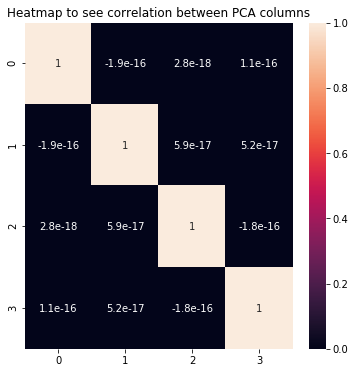

In [46]:
#Plotting the correlation between PCA columns
plt.figure(figsize=(6,6))
plt.title('Heatmap to see correlation between PCA columns')
sns.heatmap(corrmat, annot=True)
plt.show()

### Observation:
Above Heat Map represents the there is no correlation between the PCA done columns.

### K-Means Clustering

In [47]:
#K-means modelling with random K value
kmeans=KMeans(n_clusters=4, max_iter=50)

In [48]:
kmeans.fit(ngo_new_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
kmeans.labels_

array([2, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 3, 0, 0, 2, 0, 0, 3, 0, 3, 3, 2,
       2, 0, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 2, 3, 1, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 2, 0, 2, 1, 3, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 3, 3, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 2, 3, 0, 0, 0, 3, 0,
       2, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 3, 1, 3, 3, 2, 0, 1, 2, 3, 3, 2,
       1, 1, 0, 0, 1, 1, 0, 0, 2, 3, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 0, 3,
       0, 0, 0, 2, 2])

### Finding the optimal no of clusters K:
  - Using ssd/Elbow curve

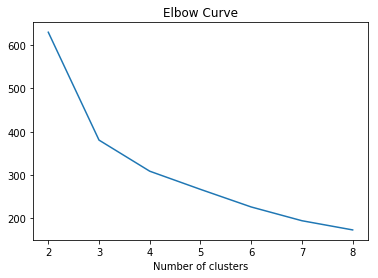

In [50]:
ssd=[]
range_num_clusters=[2,3,4,5,6,7,8]

for num_clusters in range_num_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_new_pca)
    ssd.append([num_clusters, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])
plt.xlabel('Number of clusters')
plt.title('Elbow Curve')
# plt.xticks(range_num_clusters)
plt.show()

### Observation: 
Looking at the "Elebow curve" we can saythat at cluster k=3 there is a big drop in the squared distannce. Also, at k=4 we can see the drop is not as big as previous one so we settle with k=3 from the above plot.

   - Elbow curve estimates k=3 seems good number for clustering.

### Silhouette Score

* Silhouette score range lies between -1 to 1. 

* score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [51]:
#Finding the silhouette score to determine the cluster K number

range_num_clusters=[2,3,4,5,6,7,8]

for num in range_num_clusters:
    
    #initialize Kmeans
    kmean=KMeans(n_clusters=num, max_iter=50)
    kmean.fit(ngo_new_pca)
    
    cluster_labels=kmean.labels_
    
    #Silhouette score
    silhoutte_avg=silhouette_score(ngo_new_pca,cluster_labels)
    print ("for n clusters {0}, the silhouette score is {1}".format(num, silhoutte_avg))

for n clusters 2, the silhouette score is 0.43859578530831034
for n clusters 3, the silhouette score is 0.4179345812762017
for n clusters 4, the silhouette score is 0.3515706526181045
for n clusters 5, the silhouette score is 0.350283308718651
for n clusters 6, the silhouette score is 0.35262107377176094
for n clusters 7, the silhouette score is 0.32795742150723384
for n clusters 8, the silhouette score is 0.3227797265004764


### Observation:
From the above "Silhouette score" we can clearly see that for k=2 clusters the score is high @ 0.30. Therefore, by analysing the elebow curve and silhouette score, we can take the number of clusters k=2

## K-Means - Clustering

In [52]:
#Final model with K=3
kmeans=KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(ngo_new_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [53]:
#Plotting box plots for the clusters
kmeans.labels_
kmeans.cluster_centers_

array([[ 4.05122073,  0.96135394, -0.095221  , -0.11861539],
       [-2.59092451,  0.88495992, -0.23966326,  0.10963636],
       [ 0.03272864, -0.82544785,  0.16620911, -0.01972319]])

In [54]:
df_final['Kmeans_clustID']=kmeans.labels_
df_final.head()

,country,PC1,PC2,PC3,PC4,Kmeans_clustID
0,Afghanistan,-2.946007,1.170269,0.104747,0.104747,1
1,Albania,0.401041,-1.636295,-0.066248,-0.066248,2
2,Algeria,-0.078779,-0.815208,0.086432,0.086432,2
3,Angola,-2.612629,2.247214,0.202963,0.202963,1
4,Antigua and Barbuda,2.584791,-0.160769,-0.322880,-0.322880,0


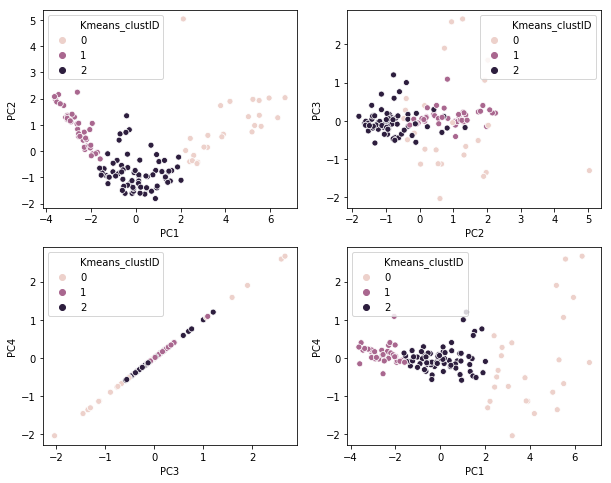

In [55]:
#Plotting Scatter plots for all the PC's to see the cluster formation
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.scatterplot(x='PC1',y='PC2',hue='Kmeans_clustID', data= df_final)

plt.subplot(2,2,2)
sns.scatterplot(x='PC2',y='PC3',hue='Kmeans_clustID', data= df_final)

plt.subplot(2,2,3)
sns.scatterplot(x='PC3',y='PC4',hue='Kmeans_clustID', data= df_final)

plt.subplot(2,2,4)
sns.scatterplot(x='PC1',y='PC4',hue='Kmeans_clustID', data= df_final)
plt.show()

In [56]:
#Lets merge the orginal dataset with the PCA's modified datasset 
#to get the corresponding cluster ID's for each rows of data
cluster_df=pd.merge(master_df, df_final, how='inner', on='country')
cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Kmeans_clustID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.946007,1.170269,0.104747,0.104747,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.401041,-1.636295,-0.066248,-0.066248,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.078779,-0.815208,0.086432,0.086432,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.612629,2.247214,0.202963,0.202963,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2.584791,-0.160769,-0.322880,-0.322880,0


In [57]:
#Lets drop the PC's from the data
cluster_df.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)

In [58]:
cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_clustID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Anlysis of clusters

In [59]:
#Group by clusetr ID
cluster_df.groupby(['Kmeans_clustID']).gdpp.mean()

Kmeans_clustID
0    17886.800000
1      987.000000
2     4796.833333
Name: gdpp, dtype: float64

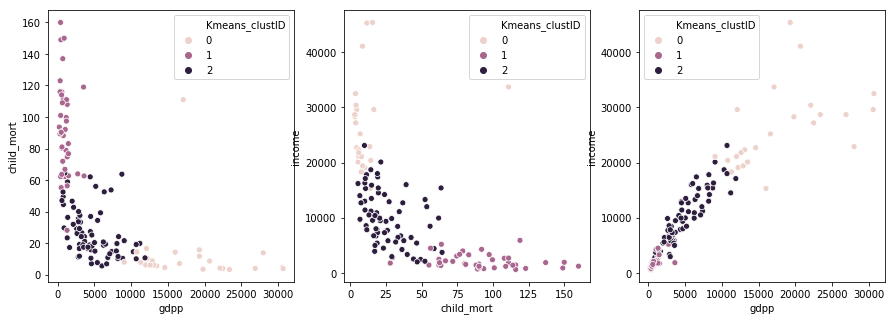

In [60]:
# Plotting the clusters
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x='gdpp', y='child_mort', hue='Kmeans_clustID', data=cluster_df, ax=axes[0])
sns.scatterplot(x='child_mort', y='income', hue='Kmeans_clustID', data=cluster_df,ax=axes[1])
sns.scatterplot(x='gdpp', y='income', hue='Kmeans_clustID', data=cluster_df, ax=axes[2])
plt.show()


In [61]:
#Lets profile the clusters by taking the mean of various attributes
child_mort_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).child_mort.mean())
exports_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).exports.mean())
health_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).health.mean())
imports_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).imports.mean())
income_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).income.mean())
inflation_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).inflation.mean())
life_expec_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).life_expec.mean())
total_fer_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).total_fer.mean())
gdp_mean=pd.DataFrame(cluster_df.groupby(['Kmeans_clustID']).gdpp.mean())
child_mort_mean

,child_mort
Kmeans_clustID,
0,12.108000
1,92.137500
2,26.531944


In [62]:
#Lets concatnate the resultant dataframe with cluster Id column
cluster_df_mean=pd.concat([child_mort_mean,exports_mean,health_mean,
                          imports_mean,income_mean,inflation_mean,
                           life_expec_mean,total_fer_mean,gdp_mean], axis=1)
cluster_df_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Kmeans_clustID,,,,,,,,,
0,12.108000,55.868000,6.872400,52.520000,26808.000000,4.212840,76.160000,1.976400,17886.800000
1,92.137500,26.897750,6.410500,43.425000,2121.575000,9.633875,59.747500,5.188250,987.000000
2,26.531944,36.762347,6.284306,45.218971,9895.138889,7.906792,71.505556,2.441667,4796.833333


## Find the observations that belong to certain clusters

From the problem statement we can see that we need the countries that are in dire need of aid.Countries that need dire need of aid has low GDP, low life expectance and child mortality rate.

In [63]:
#Top 5 Countries with Low - GDP 
cluster_df.nsmallest(5,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_clustID
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
92,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
109,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1


In [64]:
#Top 5 Countries with Low - income
cluster_df.nsmallest(5,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_clustID
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
92,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
26,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1


In [65]:
#Top 5 Countries with high - Child-mortality
cluster_df.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_clustID
109,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1
27,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
26,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
80,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1
92,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1


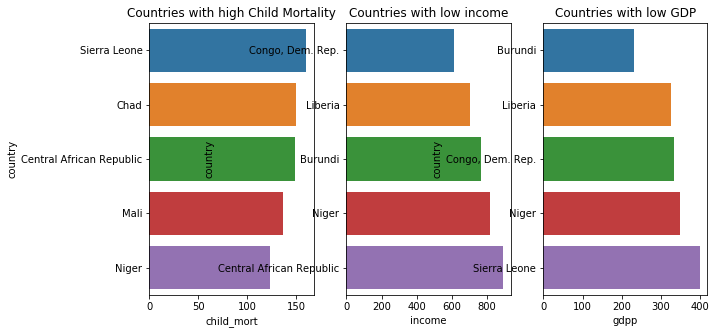

In [66]:
#Plotting the top 5 countries
i=cluster_df.nlargest(5,'child_mort')
j=cluster_df.nsmallest(5,'income')
k=cluster_df.nsmallest(5,'gdpp')


plt.figure(figsize=(10,5),)

plt.subplot(1,3,1)
sns.barplot(x=i['child_mort'],y=i['country'])
plt.title('Countries with high Child Mortality')

plt.subplot(1,3,2)
sns.barplot(x=j['income'],y=j['country'])
plt.title('Countries with low income')

plt.subplot(1,3,3)
sns.barplot(x=k['gdpp'],y=k['country'])
plt.title('Countries with low GDP')

plt.show()

## K-Means Clustering resultant top 5 countries that needs dire aid:
- Countries with high child_mort:
    1. Sierra Leone
    2. Chad
    3. Central African Republic
    4. Mali
    5. Niger

- Countries with Low GDP:
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone
- Countries with Low income:
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger
    5. Central African Republic

### Top 5 countries that need aid from K-Means Clustering is:
   1. Congo, Dem. Rep.
   2. Liberia
   3. Niger
   4. Central African Republic
   5. Sierra Leone


In [67]:
# Top 5 Countries that need dire aid according to K Means by grouping
cluster_df[cluster_df['Kmeans_clustID']==2]['country'].head()

1       Albania
2       Algeria
5     Argentina
6       Armenia
7    Azerbaijan
Name: country, dtype: object

## Hierarchical Clustering

In [68]:
df_final.head()

,country,PC1,PC2,PC3,PC4,Kmeans_clustID
0,Afghanistan,-2.946007,1.170269,0.104747,0.104747,1
1,Albania,0.401041,-1.636295,-0.066248,-0.066248,2
2,Algeria,-0.078779,-0.815208,0.086432,0.086432,2
3,Angola,-2.612629,2.247214,0.202963,0.202963,1
4,Antigua and Barbuda,2.584791,-0.160769,-0.322880,-0.322880,0


### Hierarchical Clustering: Single linkage

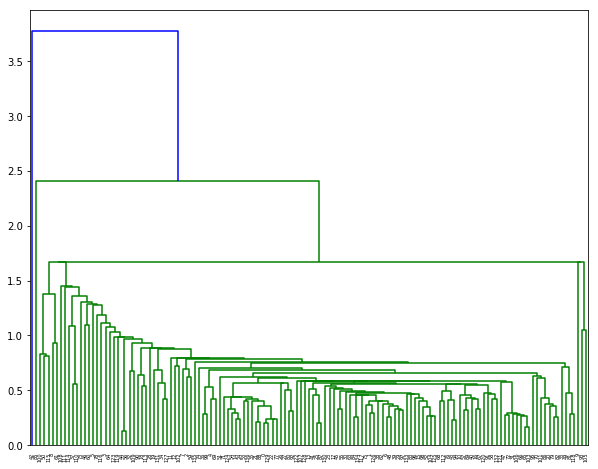

In [69]:
#Single linkage
Single_linkage=linkage(df,method='single', metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(Single_linkage)
plt.show()

### Observations:
As we can clealy see that the Dendrogram fromed with "Single Linkage" looks a little clumsy and we couldnt really identify the n nuber of clusters by visually looking at it.
Therefore moving ahead with Complete linkage Dendrogram

### Hierarchical Clustering: Complete linkage

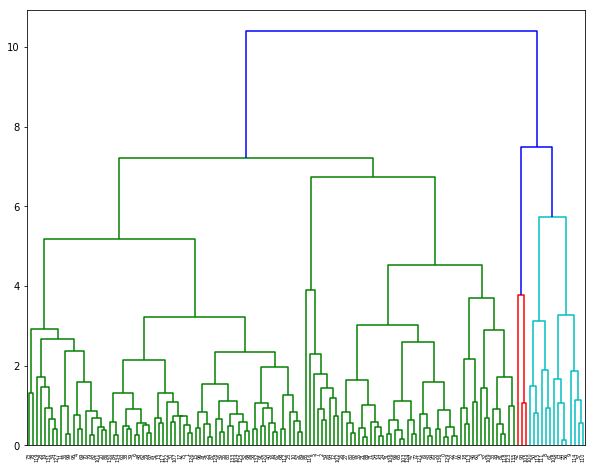

In [70]:
# complete linkage
complete_linkage = linkage(df, method="complete", metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(complete_linkage)
plt.show()

### Observations:
As we can clearly see the linkage of all the data points throgh "Complete Linkage" and we can make an estimate that n number pf clusters as 3 from the complete linkage dendrogram. 
 - Therefore, moving ahead to cut the dendrogram at 3 clusters:

In [71]:
#cutting the dndrogram @ k=3 clusters
cluster_labels = cut_tree(complete_linkage, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [72]:
## Making a new dataframe with new PCA modified columns and adding Country column
df_final_hierch=pd.DataFrame({"country": list(y),"PC1":ngo_new_pca_trans[0],"PC2":ngo_new_pca_trans[1]
                       ,"PC3":ngo_new_pca_trans[3],"PC4":ngo_new_pca_trans[3]})
df_final_hierch.shape
df_final_hierch.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.946007,1.170269,0.104747,0.104747
1,Albania,0.401041,-1.636295,-0.066248,-0.066248
2,Algeria,-0.078779,-0.815208,0.086432,0.086432
3,Angola,-2.612629,2.247214,0.202963,0.202963
4,Antigua and Barbuda,2.584791,-0.160769,-0.322880,-0.322880


In [73]:
# Assign cluster labels to the PCA modified dataset
df_final_hierch['Hierarchical_cluster_labels'] = cluster_labels
df_final_hierch.head()

,country,PC1,PC2,PC3,PC4,Hierarchical_cluster_labels
0,Afghanistan,-2.946007,1.170269,0.104747,0.104747,0
1,Albania,0.401041,-1.636295,-0.066248,-0.066248,0
2,Algeria,-0.078779,-0.815208,0.086432,0.086432,0
3,Angola,-2.612629,2.247214,0.202963,0.202963,0
4,Antigua and Barbuda,2.584791,-0.160769,-0.322880,-0.322880,0


In [74]:
#Lets merge the orginal dataset with the PCA's modified datasset 
#to get the corresponding cluster ID's for each rows of data
hier_cluster_df=pd.merge(master_df, df_final_hierch, how='inner', on='country')
hier_cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Hierarchical_cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.946007,1.170269,0.104747,0.104747,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.401041,-1.636295,-0.066248,-0.066248,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.078779,-0.815208,0.086432,0.086432,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.612629,2.247214,0.202963,0.202963,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2.584791,-0.160769,-0.322880,-0.322880,0


In [75]:
#Lets drop the PC's from the data
hier_cluster_df.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)

In [76]:
#looking the dataframe after droping the coumns
hier_cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [77]:
#Getting low GDP coutries list
hier_cluster_df.nsmallest(5,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
92,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
109,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


In [78]:
#Getting low income coutries list
hier_cluster_df.nsmallest(5,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
92,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
26,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0


In [79]:
#Getting high GDP coutries list
hier_cluster_df.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
109,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
27,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
26,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
80,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
92,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0


## Analysis of Hierarchical clusters:

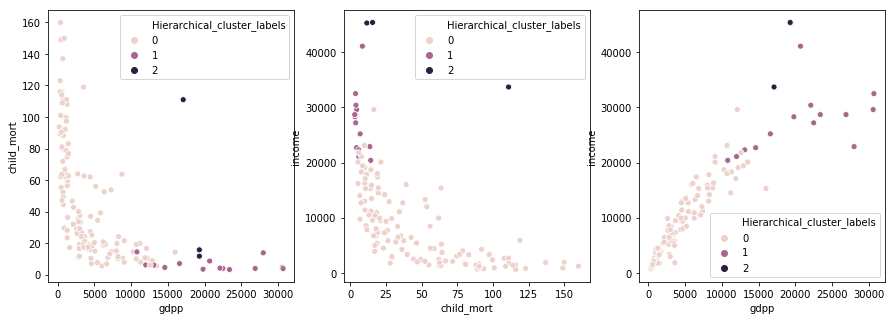

In [80]:
#Plotting a scatter plot between income and GDP which could give the clusters of countries 
#with high and low GDP w.r.t their income

f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x='gdpp', y='child_mort', hue='Hierarchical_cluster_labels', data=hier_cluster_df, ax=axes[0])
sns.scatterplot(x='child_mort', y='income', hue='Hierarchical_cluster_labels', data=hier_cluster_df,ax=axes[1])
sns.scatterplot(x='gdpp', y='income', hue='Hierarchical_cluster_labels', data=hier_cluster_df, ax=axes[2])
plt.show()

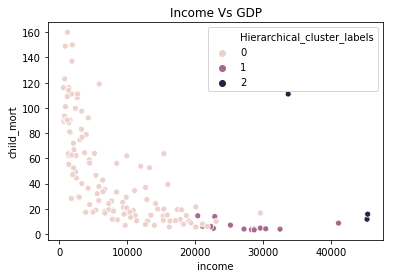

In [81]:
#Plotting a scatter plot between income and GDP which could give the clusters of countries 
#with high and low GDP w.r.t their income
sns.scatterplot(x='income',y='child_mort', hue='Hierarchical_cluster_labels', data=hier_cluster_df)
plt.title("Income Vs GDP")

plt.show()

In [82]:
#Lets profile the clusters by taking the mean of various attributes
hier_child_mort_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).child_mort.mean())
hier_exports_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).exports.mean())
hier_health_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).health.mean())
hier_imports_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).imports.mean())
hier_income_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).income.mean())
hier_inflation_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).inflation.mean())
hier_life_expec_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).life_expec.mean())
hier_total_fer_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).total_fer.mean())
hier_gdp_mean=pd.DataFrame(hier_cluster_df.groupby(['Hierarchical_cluster_labels']).gdpp.mean())
hier_child_mort_mean

,child_mort
Hierarchical_cluster_labels,
0,47.273333
1,6.235714
2,46.133333


In [83]:
#Lets concatnate the resultant dataframe with cluster Id column
hier_cluster_df_mean=pd.concat([hier_child_mort_mean,hier_exports_mean,hier_health_mean,
                          hier_imports_mean,hier_income_mean,hier_inflation_mean,
                           hier_life_expec_mean,hier_total_fer_mean,hier_gdp_mean], axis=1)
hier_cluster_df_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Hierarchical_cluster_labels,,,,,,,,,
0,47.273333,34.411658,6.341833,44.833882,8016.775000,8.237533,67.893333,3.316667,4037.683333
1,6.235714,56.357143,7.724286,56.614286,27221.428571,0.982929,77.357143,1.690714,20842.857143
2,46.133333,67.033333,3.846667,44.366667,41466.666667,19.233333,70.700000,3.690000,18566.666667


In [84]:
# Top 5 Countries that need dire aid according to Hierarchical Clustering grouping
hier_cluster_df[hier_cluster_df['Hierarchical_cluster_labels']==0]['country'].head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

## Find the observations that belong to certain clusters

From the problem statement we can see that we need the countries that are in dire need of aid.Countries that need dire need of aid has low GDP, low income and high child mortality rate.

Based on that below are the 5 top countries from the cluster formed which has low GDP,income,Child mortality

In [85]:
#Top 5 Countries with Low - GDP 
hier_cluster_df.nsmallest(5,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
92,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
109,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


In [86]:
#Top 5 Countries with Low - income
hier_cluster_df.nsmallest(5,'income')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
72,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
22,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
92,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
26,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0


In [87]:
#Top 5 Countries with high - Child-mortality
hier_cluster_df.nlargest(5,'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
109,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
27,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
26,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
80,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
92,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0


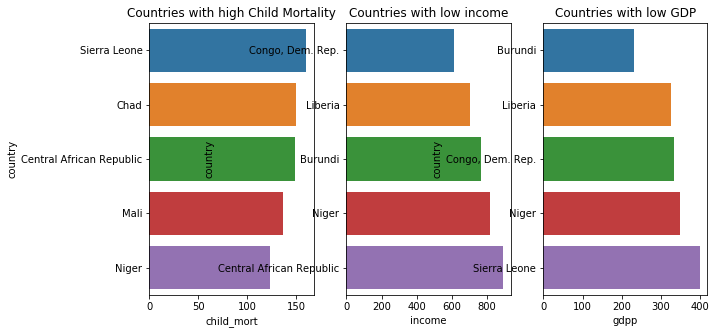

In [88]:
#Plotting the top 5 countries in bar graphs
x=hier_cluster_df.nlargest(5,'child_mort')
y=hier_cluster_df.nsmallest(5,'income')
z=hier_cluster_df.nsmallest(5,'gdpp')


plt.figure(figsize=(10,5),)

plt.subplot(1,3,1)
sns.barplot(x=x['child_mort'],y=x['country'])
plt.title('Countries with high Child Mortality')

plt.subplot(1,3,2)
sns.barplot(x=y['income'],y=y['country'])
plt.title('Countries with low income')

plt.subplot(1,3,3)
sns.barplot(x=z['gdpp'],y=z['country'])
plt.title('Countries with low GDP')

plt.show()

## Hierarchical Clustering resultant top 5 countries that needs dire aid:
- Countries with high child_mort:
        1. Nigeria
        2. Angola
        3. Burkina Faso
        4. Congo, Dem. Rep.
        5. Guinea-Bissau

- Countries with Low GDP:
        1. Burundi
        2. Liberia
        3. Congo, Dem. Rep.
        4. Nigeria
        5. Madagascar

- Countries with Low income:
        1. Congo, Dem. Rep.
        2. Liberia
        3. Burundi
        4. Nigeria
        5. Mozombique
- Top 5 countries that need aid from above is:
                1. Congo, Dem. Rep.
                2. Liberia
                3. Burundi
                4. Nigeria
                5. Angola

Therfore according to the Hierarchical clustering above are the resultant counties that the CEO should focus on.
## As hierachical clustering is good with small datasets, I prefer to report these top 5 countries for aid results to the CEO 

### Summary of Assignment -PCA & Clusttering
1. We imported the data for analysis.
2. We did the outlier analysis and found that there are outliers in some columns; removing the ouliers we lose significant amount of data relatted to different countries;so we drop the idea to treat outliers.
3. Then we did data scalling before PCA on the dataset and found the principal components as 5 principal components, as these 5 are explaining 95% of the variance in the data we have taken n-componets as 5.
    - Checked on a heat map for collinearity between coulmns and found zero correlation.
4. We now can do the K-means clustering on the data.
    - In K means we took K=4 clusters randomly and perfromed the K means.
    - Then we performed SSD/elbow curve and got optimal no of clusters as.
    - Computed Silhouette score
    - Elbow curve for optimal number of K = 3
    - Again computed KMeans with k=3
4. Analysis of K-Means and Hierarchical clustering
    - Computed Kmeans
    - Computed two types of Hierarchical clustering
            - Single linkage
            - complete linkage
            - Formed dendrogram
    - Visualized clusters
5. Provided final list of countries
    

